In [1]:
import pandas as pd

# load train data
df = pd.read_csv('train.csv')

In [2]:
# remove the Y variable
y_values = df.TARGET
df.drop('TARGET', axis=1, inplace=True)

# exploratory analysis
df.shape

(76020, 370)

In [3]:
# split the data as the train set so large
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df, train_size=10, test_size=75920)

In [4]:
# using PCA to reduce dimensionality of the data set
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
new_features_for_train_set = pca.fit_transform(train.values)
print(new_features_for_train_set.shape)

(10, 2)


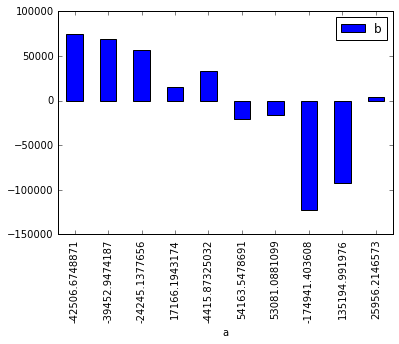

In [5]:
# matplotlib magic
%matplotlib inline

# some basic visualizations
visual_df = pd.DataFrame(new_features_for_train_set, columns=['a', 'b'])
visual_df.plot(kind='bar', x='a', y='b')